# Project: Wrangle and Analyze WeRateDogs Tweet 
<span style="font-family:Arial; font-size:1.3em;">*By: Redi Sunarta - Udacity Student (2020)*</span>

![](watch.jpg)

## Exploratory Data Analysis Report
WeRateDogs is an account that designated to rating dogs on their appearences and stories in twitter since 2015. The account has grown tremendously in popularity with many users sharing its content and requesting their dogs being rated as well. Even though, their own unusual rating system which majority dog is rated above 100% because ['They are good dogs, Brant'](https://knowyourmeme.com/memes/theyre-good-dogs-brent). They also driving force the development of the dog culture with it's new dog terms such as pupper, floofer, and doggo. My job is to create interesting and trustworthy analyses and visualizations
based on the cleaned dataset before which contain WeRateDogs tweet archive for 2015-11-15 to 2017-08-01. I can raise a few questions and know a several things using the information available in the dataset about tweet pattern over time, what kind of characteristic most get like, or what kind of animals, outside dog, are commonly detected in models. I'll use favorites (likes) count and retweet count as our main indicator for proxy of netizen rating. In fact, `rating column` can't be used because its humor purposely.
### Research Question
> The more spesific questions as follow: **How WeRateDogs account behave or netizen response the his tweet? What kind of dog stage that undetected as dog? What kind of dog stage most likely to be favorites? Which breed of dog have highest median favorites?**

In [1]:
# import statements for all of the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style="white", palette="tab10")
warnings.simplefilter(action="ignore")
pd.set_option("display.max_rows", 10)

%matplotlib inline

In [2]:
data = pd.read_csv("twitter_archive_master.csv")
data["timestamp"] = pd.to_datetime(data["timestamp"])

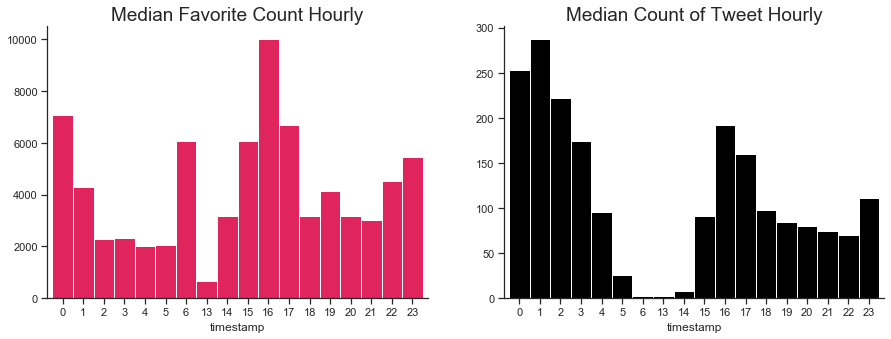

In [3]:
sns.set_style("ticks", {"xtick.mayor.size":0, "ytick.mayor.size":8})
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
data.groupby(data.timestamp.dt.hour)["likes_count"].median().plot(kind="bar", rot=0, color="#E0245E", width=1)
plt.title("Median Favorite Count Hourly", size=19)
sns.despine()
plt.subplot(1,2,2)
data.groupby(data.timestamp.dt.hour)["tweet_id"].count().plot(kind="bar", rot=0, color="black", width=1)
plt.title("Median Count of Tweet Hourly", size=19)
sns.despine();

### Key Insight
* Based on median favorite count and retweet count by hourly aggregation, WeRateDogs never tweet among 7-12 clock. I dont know what if the account use tweeter bot, have more than one admin, or other possibility. But, if [Matt Nelson](https://en.wikipedia.org/wiki/WeRateDogs) manually made tweet alone, that time must to be his schedule for bedtime or doing his 'real-job' every day. Moreover, the count of tweet on clock 5,6, and 14  is lowest point, even less than 3% of total tweet. Moreover, early morning is the time most often WeRateDogs tweet although the afternoon is a time to get lots of likes/retweets.

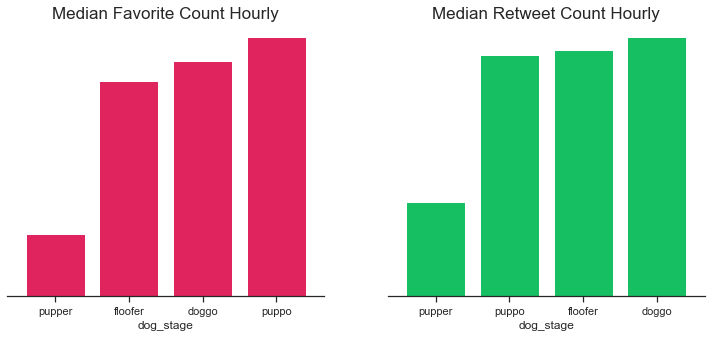

In [4]:
plt.figure(figsize=(12.5, 5))
plt.subplot(1,2,1)
data.groupby("dog_stage")["likes_count"].median().sort_values().plot(kind="bar", width=0.8,
                                                                     rot=0, color="#E0245E")
sns.despine(left=True)
plt.title("Median Favorite Count Hourly", size=17)
plt.yticks([])
plt.subplot(1,2,2)
data.groupby("dog_stage")["retweet_count"].median().sort_values().plot(kind="bar", width=0.8, 
                                                                       rot=0, color="#17BF63")
plt.title("Median Retweet Count Hourly", size=17)
sns.despine(left=True)
plt.yticks([]);

### Key Insight
* Stage of dog, pupper, have least of likes/retweets. Also, pupper have highest count, 60 times, detected in model as another animal compare to Doggo (16 times), puppo (4 times), and floofer (0 times). While, based on median of like and retweet count, doggo is most favorite stage.

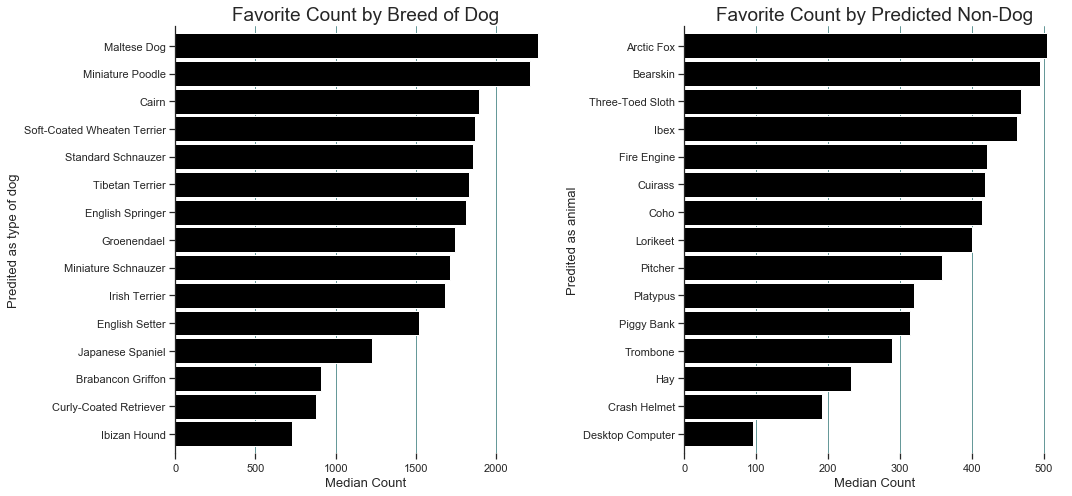

In [5]:
x = data[(data["p1_dog"] == True)]
y = data[(data["p1_dog"] == False)]

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
x.groupby("predicted1_as")["likes_count"].median().sort_values().head(15).plot(kind="barh", width=0.9,
                                                                     rot=0, color="black")
plt.title("Favorite Count by Breed of Dog", size=19)
plt.xlabel("Median Count", size=13)
plt.ylabel("Predited as type of dog", size=13)
plt.grid(axis="x", color='#408080', linestyle='-', linewidth=0.8) 
sns.despine(bottom=True)
plt.subplot(1,2,2)
y.groupby("predicted1_as")["likes_count"].median().sort_values().head(15).plot(kind="barh", width=0.9, 
                                                                       rot=0, color="black")
plt.title("Favorite Count by Predicted Non-Dog", size=19)
plt.grid(axis="x", color='#408080', linestyle='-', linewidth=0.8) 
plt.xlabel("Median Count", size=13)
plt.ylabel("Predited as animal", size=13)
sns.despine(bottom=True)
plt.tight_layout();

### Key Insight
* If the predicted photo show another animal, the tweet have low like count, even compare 1th another animal with the 15th most favorite bread of dog. Those group even almost doesn't reach 500 likes. This is interesting to empasize and can indicate that netizen/follower want to WeRateDogs focus on only dog content. If the account tweet doesn't related with dog content nor don't look like a dog, the response (interaction intensity) will be decrease.

> **Disclaimer**: This exploration only utilize descriptive statistics. I can't be certain that this relationship has a causal relationship. Moreover, I just use few columns in analysis process. Indeed, I can't discuss so much about dog because my culture has no close relationship with dogs. Therefore, I doesn't have good prior knowledge about dog.